In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


/var/folders/jk/hbt5dxkx5mv0tknb94np3_p40000gn/T/ipykernel_80534/402377039.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = conteo_tweets.index, y= conteo_tweets.values, palette="viridis")


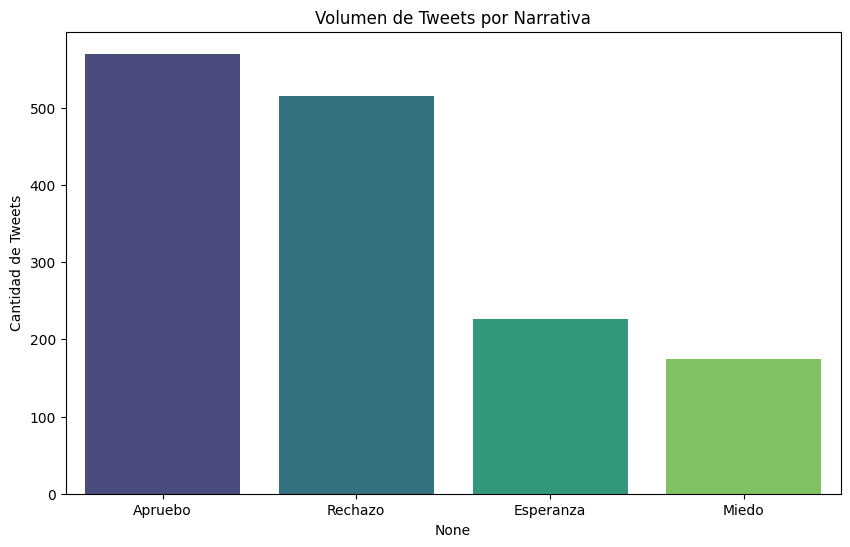

Apruebo      570
Rechazo      515
Esperanza    226
Miedo        175
dtype: int64

In [3]:
#Genero el dataframe 
df = pd.read_csv("../data/tweets_csv/megaquery.csv")
df["Tweet Creation Date"] = pd.to_datetime(df["Tweet Creation Date"])
df = df[df["Tweet Creation Date"].dt.year == 2022]
for column in ["Likes", "Retweets"]:
    df[column] = pd.to_numeric(df[column], errors="coerce").fillna(0)
#Lo que hago aca es generar nuevas columnas las cuales vana  funcionar como contadores y van a ver las palabras claves que contenga el tweet
df["Apruebo"] = df["Tweet Content"].str.contains("apruebo|votaapruebo", case=False, na=False).astype(int)
df["Rechazo"] = df["Tweet Content"].str.contains("rechazo|votarechazo", case=False, na=False).astype(int)
df["Miedo"] = df["Tweet Content"].str.contains("chilezuela|miedo|terror|comunismo", case=False, na=False).astype(int)
df["Esperanza"] = df["Tweet Content"].str.contains("esperanza|dignidad|derechos", case=False, na=False).astype(int)

columnas_temas = ["Apruebo", "Rechazo", "Miedo", "Esperanza"]
conteo_tweets = df[columnas_temas].sum().sort_values(ascending=False)
conteo_tweets
plt.figure(figsize=(10, 6))
sns.barplot(x = conteo_tweets.index, y= conteo_tweets.values, palette="viridis")
plt.title("Volumen de Tweets por Narrativa")
plt.ylabel("Cantidad de Tweets")

plt.savefig("../figures/volumen_tweets_por_narrativa.png")
plt.show()
conteo_tweets

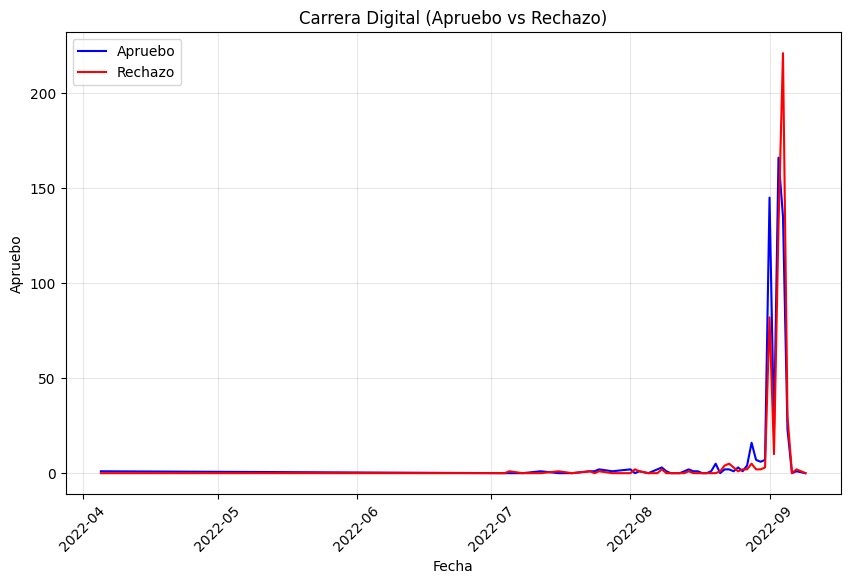

In [ ]:
#Grafico de las fechas de la publicacion de los tweets segun Apruebo y Rechazo
df['Fecha'] = df['Tweet Creation Date'].dt.date
timeline = df.groupby('Fecha')[['Apruebo', 'Rechazo']].sum()
plt.figure(figsize=(10, 6))
sns.lineplot(data=timeline, x=timeline.index, y="Apruebo", label="Apruebo", color="blue")
sns.lineplot(data=timeline, x=timeline.index, y="Rechazo", label="Rechazo", color="red")
plt.title("Carrera Digital (Apruebo vs Rechazo)")
plt.xticks(rotation = 45)
plt.grid(True, alpha = 0.3)
plt.show()

# Dias de Movimiento social
Como se puede ver graficado en pantalla los dias donde ams suele aparecer la palabra rechazo y apruebo es cerca del momento en donde se realizan las elecciones sobre el apruebo y el rechazo, donde el Rechazo fue el que mas movimiento tuvo en esta ultima instancia.

C:\Users\nicom\AppData\Local\Temp\ipykernel_1580\3451398823.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = conteo.index, y= conteo.values, palette="viridis")


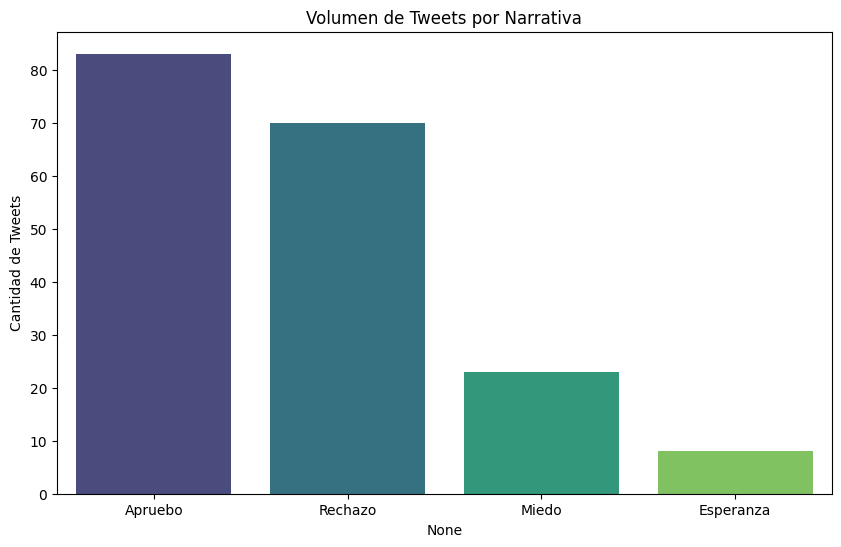

Apruebo      83
Rechazo      70
Miedo        23
Esperanza     8
dtype: int64

In [ ]:
df_2020 = pd.read_csv("../data/tweets_csv/rechazo_apruebo2020.csv")
#MUESTRA DE TWEETS CON ESTO VOY A COMPARAR CON LOS RESULTADOS DE LAS ELECCIONES 
df_2020["Tweet Creation Date"] = pd.to_datetime(df_2020["Tweet Creation Date"])
df_2020 = df_2020[df_2020["Tweet Creation Date"].dt.year == 2020]
for column in ["Likes", "Retweets"]:
    df_2020[column] = pd.to_numeric(df_2020[column], errors="coerce").fillna(0)
#Lo que hago aca es generar nuevas columnas las cuales vana  funcionar como contadores y van a ver las palabras claves que contenga el tweet
df_2020["Apruebo"] = df_2020["Tweet Content"].str.contains("apruebo|votaapruebo", case=False, na=False).astype(int)
df_2020["Rechazo"] = df_2020["Tweet Content"].str.contains("rechazo|votarechazo", case=False, na=False).astype(int)
df_2020["Miedo"] = df_2020["Tweet Content"].str.contains("chilezuela|miedo|terror|comunismo", case=False, na=False).astype(int)
df_2020["Esperanza"] = df_2020["Tweet Content"].str.contains("esperanza|dignidad|derechos", case=False, na=False).astype(int)

colum = ["Apruebo", "Rechazo", "Miedo", "Esperanza"]
conteo = df_2020[colum].sum().sort_values(ascending=False)
conteo
plt.figure(figsize=(10, 6))
sns.barplot(x = conteo.index, y= conteo.values, palette="viridis")
plt.title("Volumen de Tweets por Narrativa")
plt.ylabel("Cantidad de Tweets")
plt.show()
conteo

In [43]:
servel_datos = pd.read_csv("../data/raw/servel_total.csv")
total_general = servel_datos["Total"].sum()
servel_datos
servel_datos["Porcentaje"] = (servel_datos["Total"] / total_general) * 100
servel_datos["Porcentaje"] = servel_datos["Porcentaje"].round(3)
servel_datos

,Nro.voto,Opción Constitución Política,Chile,Extranjero,Total,Porcentaje
0,1.0,APRUEBO,5874352,25331,5899683,38.947
1,2.0,RECHAZO,1628958,5548,1634506,10.790
2,900.0,VOTOS NULOS,27329,52,27381,0.181
3,901.0,VOTOS EN BLANCO,12313,31,12344,0.081
4,NaN,TOTAL,7542952,30962,7573914,50.000


# Resultado
Viendo el grafico muestral con la muestra de los tweets podemos darnos cuenta que si tiene mucha congruencia entre ellos ya que lo que se ve reflejado o las interacciones que tuvieron el apruebo y el rechazo se pudo haber predecido los resultados ya que como se puede ver, el apruebo le gano al rechazo en las votaciones aunque por twiter estaba un poco mas peleado.